## Metody Nieparametryczne w Statystyce
# Zadanie 2
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w klasycznym teście równości dwóch wartości oczekiwanych i w teście Manna-Whitneya w przypadku, gdy dane w obu próbkach pochodzą z rozkładu normalnego o takiej samej wartości oczekiwanej, lecz różnią się odchyleniami standardowymi. W każdym przypadku wyznaczyć empiryczne wartości krytyczne.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [2]:
import numpy as np, pandas as pd
from scipy.stats import norm, mannwhitneyu, ttest_ind
from tqdm import tqdm
import matplotlib.pyplot as plt

2. Badanie odsetków odrzuceń prawdziwej hipotezy głównej w teście t-Studenta na równość wartości oczekiwanych oraz teście Manna-Whitneya.

Test t-Studenta polega na obliczeniu statystyki t na podstawie różnicy pomiędzy średnimi próbek, ich liczebności oraz odchylenia standardowego i obliczeniu p-value.

Test Manna-Whitneya opiera się na porównywaniu sumy rang jednej próbki z sumą rang drugiej próbki w celu stwierdzenia, czy istnieje statystycznie istotna różnica między medianami tych grup.

H0: wartości oczekiwane są sobie równe

H1: wartości oczekiwane są różne

Zliczam przypadki, w których hipoteza zerowa zostaje odrzucona.

Test  t-studenta


100%|██████████| 140/140 [00:26<00:00,  5.22it/s]


Test  Manna-Whitneya


100%|██████████| 140/140 [01:15<00:00,  1.85it/s]


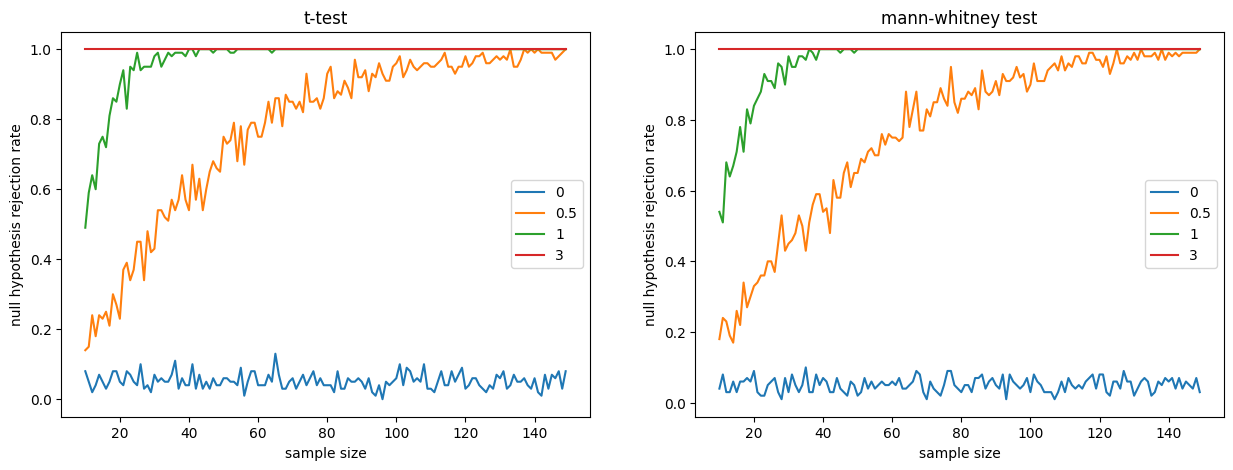

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for k in range(0, 2):    
    results = pd.DataFrame(columns=["0", "0.5", "1", "3"])
    buf = []
    print("Test ", "t-studenta" if k == 0 else "Manna-Whitneya")
    for n in tqdm(range (10, 150)):
        for i in range (0, 100):
            for mu in [0, 0.5, 1, 3]:
                #generowanie dwóch wektorów liczbowych z rozkładu normalnego
                x1 = norm.rvs(size=n, loc=0 , scale=1)
                x2 = norm.rvs(size=n, loc=mu, scale=1)
                
                #testy na równość wartości oczekiwanej
                if k == 0:
                    buf.append(ttest_ind(x1, x2)[1] < .05)
                else:
                    buf.append(mannwhitneyu(x1, x2)[1] < .05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(title="t-test" if k == 0 else "mann-whitney test", ax = axes[k],
                xlabel="sample size", ylabel="null hypothesis rejection rate")

Analogicznie do zadania pierwszego, widzimy, że dla wartości oczekiwanej próbki ze sparametryzowanego rozkładu równej 0 odsetek odrzuceń prawdziwej hipotezy głównej jest bardzo niski, zwiększa się on natomiast w przypadku większych różnic pomiędzy wartościami oczekiwanymi oraz wraz ze wzrostem liczby obserwacji.